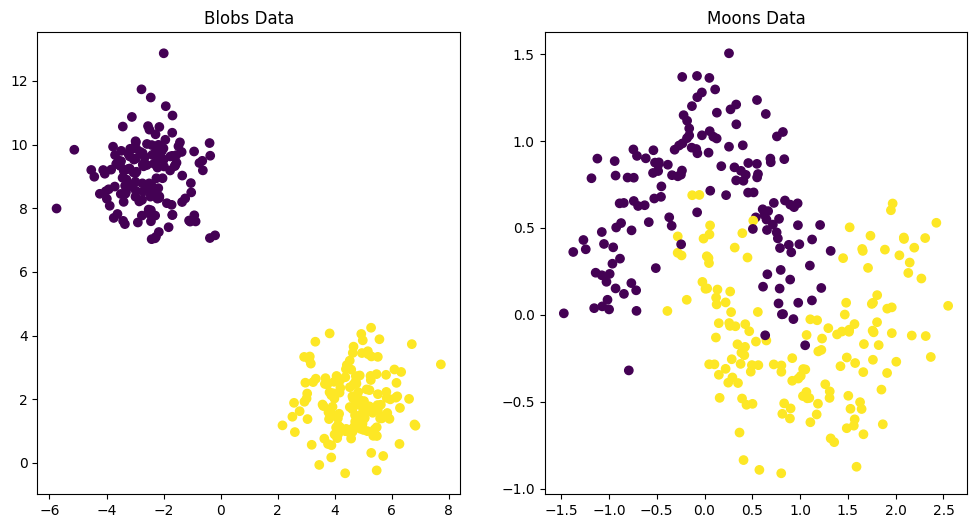

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Generate simple data
X_blobs, y_blobs = make_blobs(n_samples=300, centers=2, random_state=42)

# Generate more complex data
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)

# Plot generated data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis')
plt.title('Blobs Data')
plt.subplot(1, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis')
plt.title('Moons Data')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, test_size=0.3, random_state=42)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train_blobs, y_train_blobs)
    y_pred_blobs = clf.predict(X_test_blobs)
    acc_blobs = accuracy_score(y_test_blobs, y_pred_blobs)

    clf.fit(X_train_moons, y_train_moons)
    y_pred_moons = clf.predict(X_test_moons)
    acc_moons = accuracy_score(y_test_moons, y_pred_moons)

    results[kernel] = {'blobs': acc_blobs, 'moons': acc_moons}

results


{'linear': {'blobs': 1.0, 'moons': 0.9},
 'poly': {'blobs': 1.0, 'moons': 0.9111111111111111},
 'rbf': {'blobs': 1.0, 'moons': 0.9666666666666667},
 'sigmoid': {'blobs': 1.0, 'moons': 0.6444444444444445}}

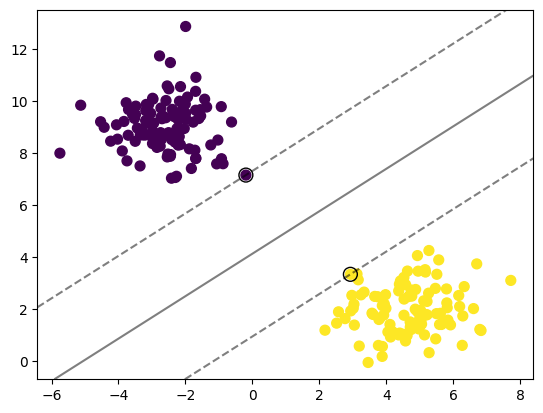

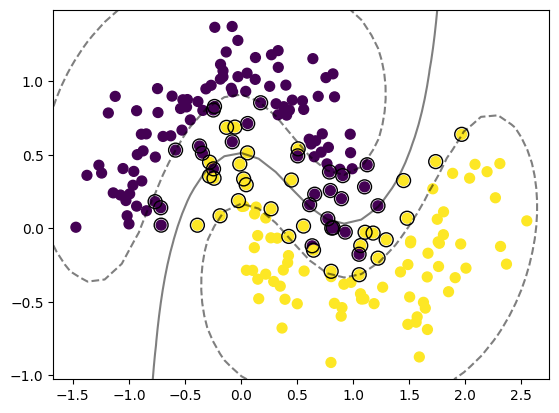

In [ ]:
def plot_svm_decision_boundary(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

# Plot for simple data with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train_blobs, y_train_blobs)
plot_svm_decision_boundary(clf, X_train_blobs, y_train_blobs)

# Plot for complex data with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X_train_moons, y_train_moons)
plot_svm_decision_boundary(clf, X_train_moons, y_train_moons)
